In [1]:
# 

import pandas as pd
import re, requests
from bs4 import BeautifulSoup

In [12]:
# setting plt

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
fm.findSystemFonts()
font = {"family":"IPAexGothic"}
mpl.rc('font', **font)

In [2]:
# nogizaka46

headers = {'User-Agent':'Mozilla/5.0'}
target_url = 'http://www.nogizaka46.com/member/'
r = requests.get(target_url, headers=headers)
soup = BeautifulSoup(r.text, 'lxml')

home_url = 'http://www.nogizaka46.com/member'
member_urls = []
for i in soup.find_all('div', class_='unit'):
    mem_url = i.find('a').get('href')
    member_urls.append('%s/%s'%(home_url, mem_url[2:]))

profiles = []
for member_url in sorted(member_urls):
    r = requests.get(member_url, headers=headers)
    member_soup = BeautifulSoup(r.text, 'lxml')
    mem_detail = member_soup.find('div', class_='clearfix', id='profile')

    furigana = mem_detail.h2.span.text.replace(' ','')
    name = mem_detail.h2.text.replace(' ','').replace(furigana,'')
    prof = [ i.text for i in mem_detail.find_all('dd')]
    profimg_url = mem_detail.find('img').get('src')
    
    tmp = [name, furigana, profimg_url]
    tmp.extend( [prof[0], prof[2], prof[3], None, prof[1]] )
    profiles.append( tmp )
    # print( name, member_url )    

In [3]:
# check

col_names = ['name', 'furigana', 'profile_image', 'birthday', 'constellation', 'height', 'birthplace', 'bloodtype']
df = pd.DataFrame( profiles, columns=col_names)
print( df.shape )
display( df.head() )

(48, 8)


,name,furigana,profile_image,birthday,constellation,height,birthplace,bloodtype
0,秋元真夏,あきもとまなつ,https://img.nogizaka46.com/www/member/img/akim...,1993年8月20日,しし座,154cm,None,B型
1,遠藤さくら,えんどうさくら,https://img.nogizaka46.com/www/member/img/endo...,2001年10月3日,てんびん座,160cm,None,不明
2,衛藤美彩,えとうみさ,https://img.nogizaka46.com/www/member/img/etou...,1993年1月4日,やぎ座,163cm,None,AB型
3,早川聖来,はやかわせいら,https://img.nogizaka46.com/www/member/img/haya...,2000年8月24日,おとめ座,164cm,None,A型
4,樋口日奈,ひぐちひな,https://img.nogizaka46.com/www/member/img/higu...,1998年1月31日,みずがめ座,159cm,None,A型


In [4]:
# save csv

df.to_csv( '../data/nogizaka46_profile.csv', index=0 )

In [5]:
# keyakizaka

target_url = 'http://www.keyakizaka46.com/s/k46o/search/artist'
r = requests.get(target_url)
soup = BeautifulSoup(r.text, 'lxml')

home_url = 'http://www.keyakizaka46.com'
member_urls = []
for li in soup.find_all('li'):
    if li.get('data-member') == None: continue
    member_url = li.find('a').get('href')
    if 'newmember' in member_url: continue # remove new member 
    member_urls.append( '%s/%s' % (home_url, member_url) )

member_urls = list( set( member_urls ) )
profiles = []
for member_url in sorted(member_urls):
    r = requests.get(member_url)
    member_soup = BeautifulSoup(r.text, 'lxml')
    mem_detail = member_soup.find_all('div', class_='keyaki-member_detail')[0]
    
    profimg_url = mem_detail.find('img').get('src')
    name = mem_detail.find('p', class_='name').text.replace(' ','').replace('\n','')
    furigana = mem_detail.find('p', class_='furigana').text.replace(' ','').replace('\n','')
    prof = [ i.text.replace(' ','').replace('\n','') for i in mem_detail.find_all('dt') ]
    
    tmp = [name, furigana, profimg_url]
    tmp.extend( prof )
    profiles.append( tmp )
    # print( name, member_url )

In [6]:
# check

col_names = ['name', 'furigana', 'profile_image', 'birthday', 'constellation', 'height', 'birthplace', 'bloodtype']
df = pd.DataFrame( profiles, columns=col_names)
print( df.shape )
display( df.head() )

(38, 8)


,name,furigana,profile_image,birthday,constellation,height,birthplace,bloodtype
0,石森虹花,いしもりにじか,http://cdn.keyakizaka46.com/images/14/b66/d35a...,1997年5月7日,おうし座,162cm,宮城,A型
1,上村莉菜,うえむらりな,http://cdn.keyakizaka46.com/images/14/82c/ac93...,1997年1月4日,やぎ座,152cm,千葉,O型
2,尾関梨香,おぜきりか,http://cdn.keyakizaka46.com/images/14/341/40f9...,1997年10月7日,てんびん座,156cm,神奈川,O型
3,織田奈那,おだなな,http://cdn.keyakizaka46.com/images/14/714/3ffb...,1998年6月4日,ふたご座,162cm,静岡,O型
4,小池美波,こいけみなみ,http://cdn.keyakizaka46.com/images/14/8ce/3ad4...,1998年11月14日,さそり座,159cm,兵庫,B型


In [7]:
# save csv

df.to_csv( '../data/keyakizaka46_profile.csv', index=0 )

In [32]:
# sakamichi df

dfnogi = pd.read_csv( '../data/nogizaka46_profile.csv' )
dfkeyaki = pd.read_csv( '../data/keyakizaka46_profile.csv' )
dfsaka = pd.concat([dfnogi, dfkeyaki]).reset_index(drop=True)

In [33]:
def height_change(x): return int(x.replace('cm',''))
dfsaka['height'] = dfsaka['height'].apply(height_change)
height_sorted = dfsaka.sort_values('height', ascending=False)

In [34]:
print('坂道 高身長 Top10')
display( height_sorted.head(10) )

坂道 高身長 Top10


,name,furigana,profile_image,birthday,constellation,height,birthplace,bloodtype
59,土生瑞穂,はぶみづほ,http://cdn.keyakizaka46.com/images/14/956/f6e8...,1997年7月7日,かに座,171,東京,A型
40,梅澤美波,うめざわみなみ,https://img.nogizaka46.com/www/member/img/umez...,1999年1月6日,やぎ座,170,NaN,A型
22,中村麗乃,なかむられの,https://img.nogizaka46.com/www/member/img/naka...,2001年9月27日,てんびん座,167,NaN,不明
72,佐々木久美,ささきくみ,http://cdn.keyakizaka46.com/images/14/ecc/ebb5...,1996年1月22日,みずがめ座,167,千葉,O型
9,伊藤純奈,いとうじゅんな,https://img.nogizaka46.com/www/member/img/itou...,1998年11月30日,いて座,166,NaN,A型
63,渡辺梨加,わたなべりか,http://cdn.keyakizaka46.com/images/14/54f/31ad...,1995年5月16日,おうし座,166,茨城,O型
82,濱岸ひより,はまぎしひより,http://cdn.keyakizaka46.com/images/14/932/c998...,2002年9月28日,てんびん座,166,福岡,A型
64,渡邉理佐,わたなべりさ,http://cdn.keyakizaka46.com/images/14/752/0239...,1998年7月27日,しし座,166,茨城,O型
56,菅井友香,すがいゆうか,http://cdn.keyakizaka46.com/images/14/a16/9acd...,1995年11月29日,いて座,166,東京,AB型
14,賀喜遥香,かきはるか,https://img.nogizaka46.com/www/member/img/kaki...,2001年8月8日,しし座,166,NaN,A型


In [35]:
print('坂道 低身長 Top10')
display( height_sorted.tail(10) )

坂道 低身長 Top10


,name,furigana,profile_image,birthday,constellation,height,birthplace,bloodtype
71,齊藤京子,さいとうきょうこ,http://cdn.keyakizaka46.com/images/14/2ef/8bed...,1997年9月5日,おとめ座,154,東京,A型
11,伊藤理々杏,いとうりりあ,https://img.nogizaka46.com/www/member/img/itou...,2002年10月8日,てんびん座,154,NaN,B型
76,東村芽依,ひがしむらめい,http://cdn.keyakizaka46.com/images/14/19a/b91f...,1998年8月23日,おとめ座,153,奈良,O型
78,河田陽菜,かわたひな,http://cdn.keyakizaka46.com/images/14/fca/6501...,2001年7月23日,しし座,153,山口,B型
42,渡辺みり愛,わたなべみりあ,https://img.nogizaka46.com/www/member/img/wata...,1999年11月1日,さそり座,153,NaN,O型
10,伊藤かりん,いとうかりん,https://img.nogizaka46.com/www/member/img/itou...,1993年5月26日,ふたご座,153,NaN,O型
49,上村莉菜,うえむらりな,http://cdn.keyakizaka46.com/images/14/82c/ac93...,1997年1月4日,やぎ座,152,千葉,O型
46,与田祐希,よだゆうき,https://img.nogizaka46.com/www/member/img/yoda...,2000年5月5日,おうし座,152,NaN,O型
20,向井葉月,むかいはづき,https://img.nogizaka46.com/www/member/img/muka...,1999年8月23日,おとめ座,152,NaN,A型
43,矢久保美緒,やくぼみお,https://img.nogizaka46.com/www/member/img/yaku...,2002年8月14日,しし座,152,NaN,B型


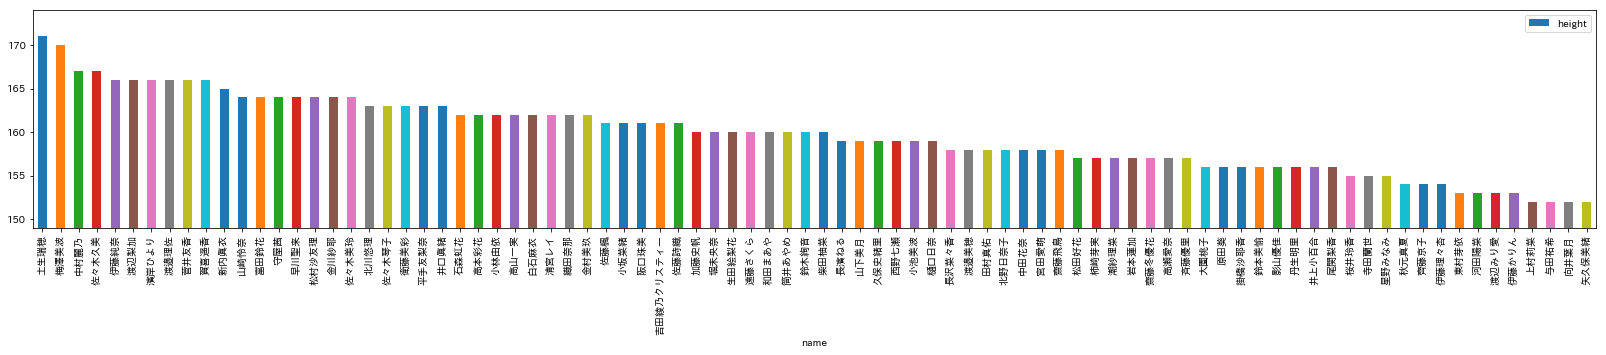

In [65]:
# plot article numbers each author

height_sorted.plot( kind='bar', x='name', y='height',figsize=(28,4),
                    ylim=(height_sorted['height'].values[-1]-3, height_sorted['height'].values[0]+3) )
plt.show()